
I'm doing this in english so I hope you don't mind.


To start off import pandas and matplotlib.pyplot.
Also import acceleration data from a csv file.
Use pandas to calculate the mean and standard deviation of the data.
I want the mean values and std. deviations to look nice so I'll just convert them into a HTML table.
Display head. Head is king. For some reason it looks nice to me.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Acceleration_observation.csv')

#Define the variables and calculate the mean and standard deviation for each column  
mean_values = df.mean()
std_values = df.std()

# Create a DataFrame for the mean and standard deviation values
summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})

# Display the DataFrame in a more readable format using HTML
from IPython.display import display, HTML
display(HTML(summary_df.to_html()))

#I wouldn't need to do this but I like how the head() data looks so here it is
df.head()

,Mean,Standard Deviation
Time (s),11.616811,6.675846
Linear Acceleration x (m/s^2),0.045138,1.125243
Linear Acceleration y (m/s^2),-0.316582,1.222932
Linear Acceleration z (m/s^2),0.011273,1.460279
Absolute acceleration (m/s^2),1.929551,1.127241


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.105708,0.149306,-0.024812,0.033842,0.155091
1,0.122698,-0.067695,-0.055539,0.053947,0.102847
2,0.139698,-0.233865,-0.089927,0.067040,0.259372
3,0.156673,-0.199931,-0.042582,0.008482,0.204592
4,0.173680,-0.097435,-0.049072,-0.033701,0.114181



Plot the data into a figure by using matplotlib.pyplot.
I needed to smooth out the data because it looked dense/stuffed so it's more readable now. This was suggested by AI since I'm not a friggin genious.
The smoothin also means that the data is not as accurately displayed as it could be, but I think we get can still make the necessary observations from this.
Mark out all the labels and stufferinos. 


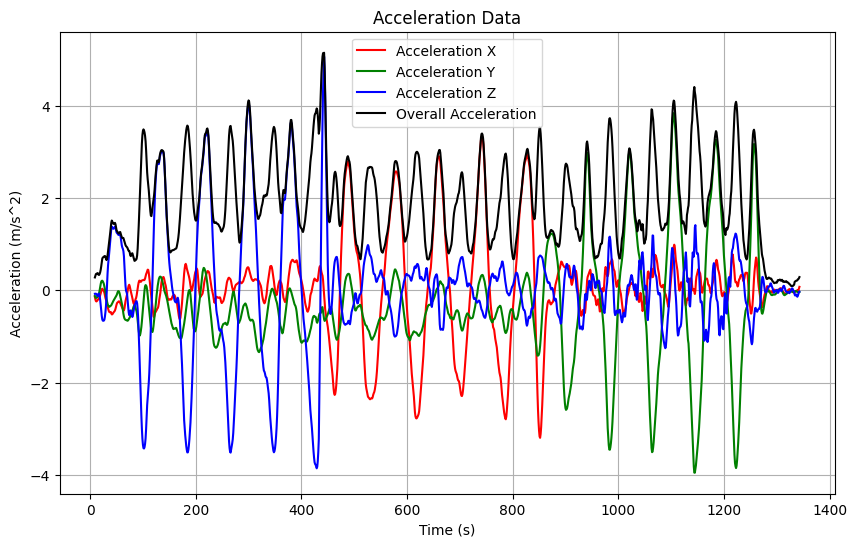

In [15]:
#Plot the data
#Define the size of the figure
plt.figure(figsize=(10, 6))

# Apply a simple moving average with a window size of 10
df_smoothed = df.rolling(window=10).mean()

#Define the data points, label them and color them to differ from each other
plt.plot(df_smoothed['Linear Acceleration x (m/s^2)'], label='Acceleration X', color='r')
plt.plot(df_smoothed['Linear Acceleration y (m/s^2)'], label='Acceleration Y', color='g')
plt.plot(df_smoothed['Linear Acceleration z (m/s^2)'], label='Acceleration Z', color='b')
plt.plot(df_smoothed['Absolute acceleration (m/s^2)'], label='Overall Acceleration', color='k')

#Define everything else in the figure. This means the axis, title, legend and grid
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Data')
plt.legend()
plt.grid(True)

#Show it to the people
plt.show()


The phone was held in hand and horizontally.
The movements were: Up-down (Screen is up, backside is down), left-right, and forward-backward.
It is observed that initially the movement is dominant in the Z-axis (up-down), then in the x-component (left-right), and finally in the Y-axis (forward-backward).
X-axis: Points from left to right side of the phone
Y-axis: Points from top of the phone (speaker) to bottom (charging port)
Z-axis: Points outwards from the screen and back of the phone

Here's a screenshot of the sensor data from my phone. The colors look a bit washed out since I shrunk it a bit from the original 2k resolution. We can observe that the Acceleration Data above matches with the sensordata from the phone. Which is a given since the data came from the phone. So. There we go. 

# ![Alt text](./Screenshot.png)

This next part is a script to export this notebook into HTML, inject some codeblock styling into the HTML and then converting the html to pdf. This is because for some stupid reason the pdf conversion doesn't work for me even though I painstakingly installed TeX Live.

So now we have this monstrosity.

In [6]:
!jupyter nbconvert --to html acceleration.ipynb

# Add custom CSS to the HTML file
html_file = 'acceleration.html'
with open(html_file, 'r', encoding='utf-8') as file:
    html_content = file.read()

custom_css = """
<style>
pre {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 10px;
    border-radius: 5px;
    overflow: auto;
}
code {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 2px 4px;
    border-radius: 3px;
}
</style>
"""

# Insert the custom CSS into the <head> section of the HTML file
html_content = html_content.replace('<head>', '<head>' + custom_css)

# Write the modified HTML content back to the file
with open(html_file, 'w', encoding='utf-8') as file:
    file.write(html_content)

# Convert HTML to PDF using wkhtmltopdf with --enable-local-file-access
!wkhtmltopdf --enable-local-file-access acceleration.html acceleration.pdf

[NbConvertApp] Converting notebook acceleration.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 480327 bytes to acceleration.html
Loading pages (1/6)
[>                                                           ] 0%
[======>                                                     ] 10%
[============================>                               ] 47%
[============================>                               ] 48%
[======================================================>     ] 90%
[======================================================>     ] 90%
[============================================================] 100%
Counting pages (2/6)                                               
[============================================================] Object 1 of 1
Resolving links (4/6)                                                       
[============================================================] Object 1 of 1
Loading headers and foote